
## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.

# PART- 3 `( Handling Outliers )`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
#%matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100pd.set_option('display.max_columns', 500)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150
pd.options.display.max_columns = 100

In [2]:
df0 = pd.read_csv('autoscoutpart_2(prev_owner).csv')

In [3]:
df = df0.copy()

## functions to fill the missing values

In [4]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [5]:
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [6]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [7]:
df.shape

(15919, 39)

In [8]:
df.head(1).T

,0
make_model,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima
body_type,Sedans
price,15770.000
vat,YES deduction/negotiation
km,56013.000
registration,2016.000
prev_owner,2.000
inspection_new,Yes
body_color,Black


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             15919 non-null  object 
 1   short_description      15873 non-null  object 
 2   body_type              15919 non-null  object 
 3   price                  15919 non-null  float64
 4   vat                    15919 non-null  object 
 5   km                     15919 non-null  float64
 6   registration           14322 non-null  float64
 7   prev_owner             15919 non-null  float64
 8   inspection_new         15919 non-null  object 
 9   body_color             15919 non-null  object 
 10  paint_type             15919 non-null  object 
 11  body_color_original    12145 non-null  object 
 12  nr._of_doors           15919 non-null  float64
 13  nr._of_seats           15919 non-null  float64
 14  model_code             15919 non-null  object 
 15  ge

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15919.000,18022.623,7381.798,4950.000,12850.000,16900.000,21900.000,74600.000
km,15919.000,32082.632,36975.502,0.000,1906.500,20407.000,46898.500,317000.000
registration,14322.000,2017.458,1.077,2016.000,2016.000,2018.000,2018.000,2019.000
prev_owner,15919.000,1.049,0.329,0.000,1.000,1.000,1.000,4.000
nr._of_doors,15919.000,4.660,0.642,2.000,4.000,5.000,5.000,5.000
nr._of_seats,15919.000,4.947,0.486,2.000,5.000,5.000,5.000,7.000
cylinders,15919.000,3.786,0.414,3.000,4.000,4.000,4.000,5.000
co2_emission,15919.000,118.082,16.952,91.000,105.000,117.000,128.000,189.000
emission_label,15919.000,3.928,0.460,1.000,4.000,4.000,4.000,5.000
gears,15919.000,5.948,0.731,5.000,5.000,6.000,6.000,9.000


In [11]:
df['cons_city_l/100_km'].skew()

0.37642746962652146

In [12]:
df['cons_comb_l/100_km'].skew()

0.8078774954022488

In [13]:
df['cons_country_l/100_km'].skew()

1.6520754260236912

In [14]:
df.describe(include=object).T

,count,unique,top,freq
make_model,15919,9,Audi A3,3097
short_description,15873,10001,SPB 1.6 TDI 116 CV S tronic Sport,64
body_type,15919,9,Sedans,7923
vat,15919,2,YES deduction/negotiation,11406
inspection_new,15919,2,Yes,12818
body_color,15919,15,Black,3899
paint_type,15919,3,Metallic,15504
body_color_original,12145,1926,Onyx Schwarz,338
model_code,15919,277,0588/AYB,1467
gearing_type,15919,3,Manual,8153


In [15]:
num = df.drop(['price'], axis=1).select_dtypes('number').columns

In [16]:
df[num]

,km,registration,prev_owner,nr._of_doors,nr._of_seats,cylinders,co2_emission,emission_label,gears,age,hp_kw,next_inspection_year,displacement_cc,weight_kg,cons_comb_l/100_km,cons_city_l/100_km,cons_country_l/100_km
0,56013.000,2016.000,2.000,5.000,5.000,3.000,99.000,4.000,7.000,3.000,66.000,2021.000,1422.000,1220.000,3.800,4.300,3.500
1,80000.000,2017.000,1.000,3.000,4.000,4.000,129.000,4.000,7.000,2.000,141.000,NaN,1798.000,1255.000,5.600,7.100,4.700
2,83450.000,2016.000,1.000,4.000,4.000,4.000,99.000,4.000,7.000,3.000,85.000,NaN,1598.000,1275.000,3.800,4.400,3.400
3,73000.000,2016.000,1.000,3.000,4.000,3.000,99.000,4.000,6.000,3.000,66.000,NaN,1422.000,1195.000,3.800,4.300,3.500
4,16200.000,2016.000,1.000,5.000,5.000,3.000,109.000,4.000,7.000,3.000,66.000,NaN,1422.000,1195.000,4.100,4.600,3.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1652.839,NaN,1.000,5.000,5.000,4.000,139.000,4.000,6.000,0.000,147.000,NaN,1997.000,1758.000,5.300,6.200,4.700
15915,9900.000,2019.000,1.000,5.000,5.000,4.000,168.000,4.000,7.000,0.000,165.000,2022.000,1798.000,1708.000,7.400,9.200,6.300
15916,15.000,2019.000,1.000,5.000,7.000,4.000,139.000,4.000,6.000,0.000,146.000,NaN,1997.000,1840.000,5.300,6.200,4.700
15917,10.000,2019.000,1.000,5.000,7.000,4.000,139.000,4.000,6.000,0.000,147.000,NaN,1997.000,1758.000,5.300,6.200,4.700


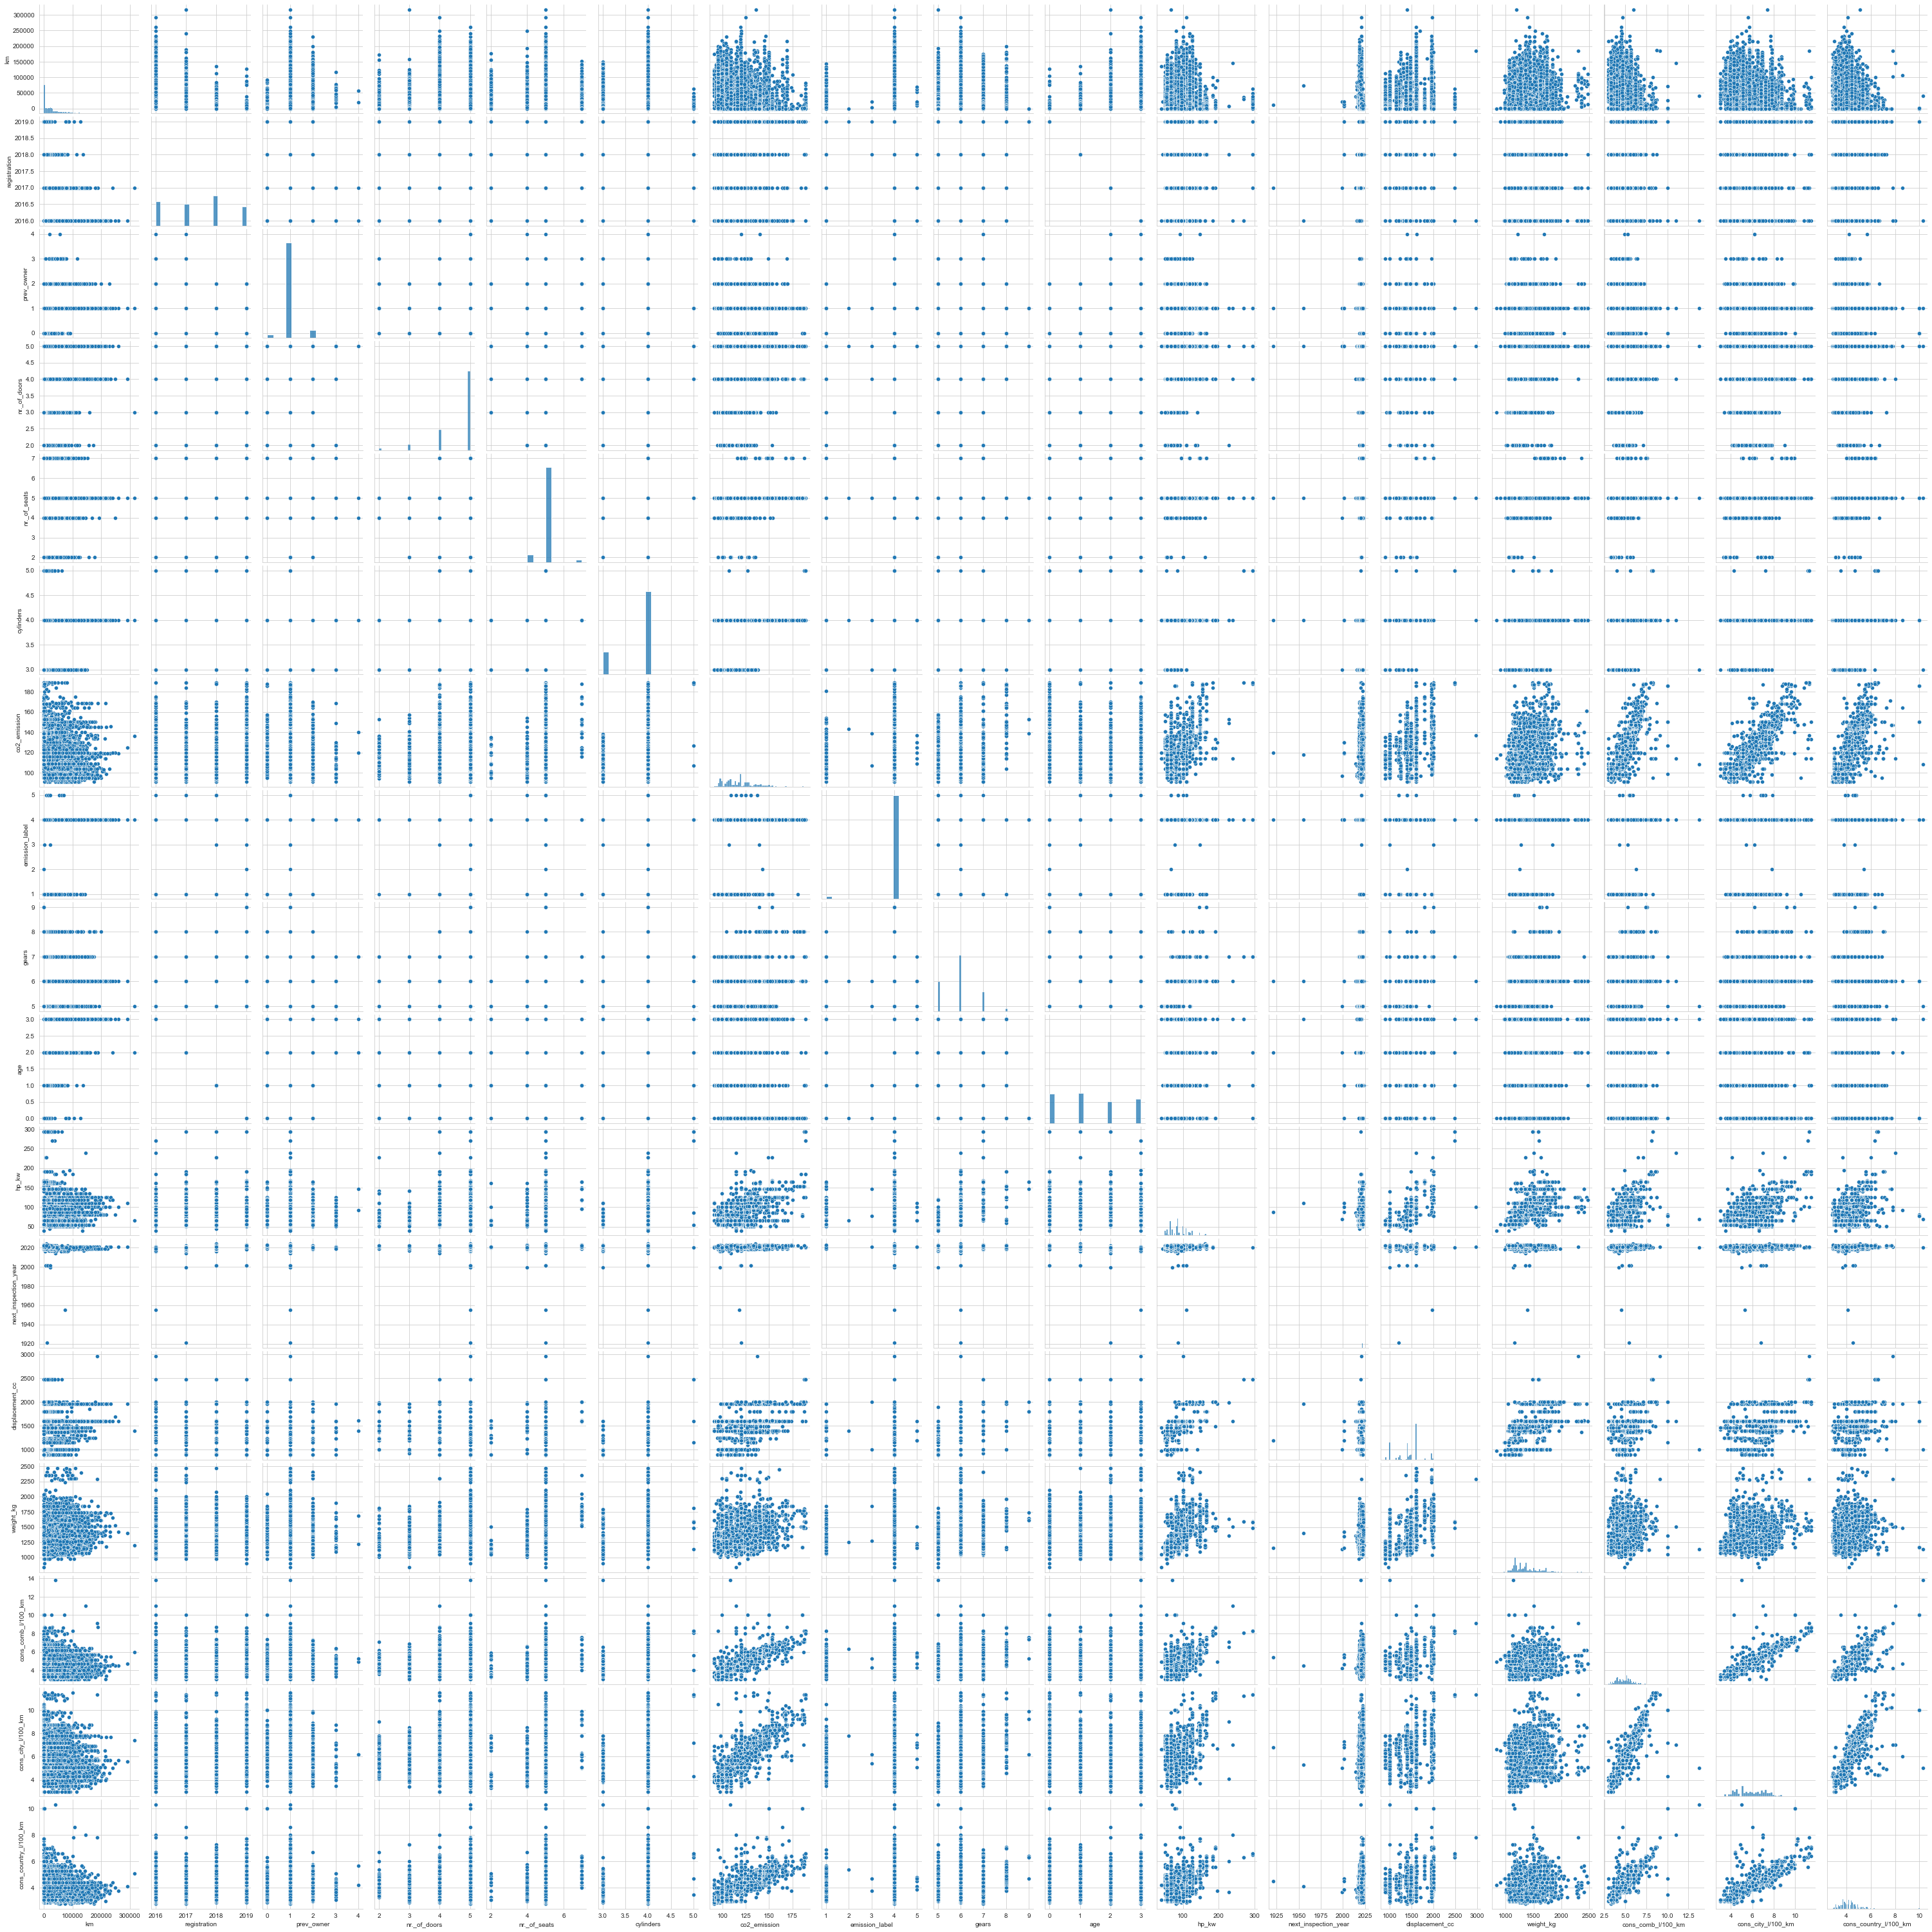

In [17]:
sns.pairplot(df[num], size = 2.5)
plt.show();

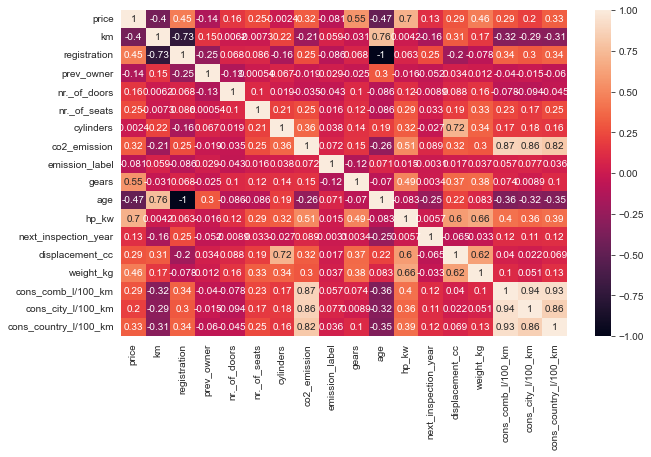

In [18]:
sns.heatmap(df.corr(), annot=True);

In [19]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'vat', 'km',
       'registration', 'prev_owner', 'inspection_new', 'body_color',
       'paint_type', 'body_color_original', 'nr._of_doors', 'nr._of_seats',
       'model_code', 'gearing_type', 'cylinders', 'drive_chain', 'fuel',
       'co2_emission', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'emission_label',
       'gears', 'age', 'hp_kw', 'vehicle_condition', 'next_inspection_year',
       'warranty_month', 'upholstery_type', 'upholstery_color',
       'displacement_cc', 'weight_kg', 'cons_comb_l/100_km',
       'cons_city_l/100_km', 'cons_country_l/100_km'],
      dtype='object')

In [20]:
#df.drop(['cons_city_l/100_km', 'cons_country_l/100_km'], axis=1, inplace=True)

In [21]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770.000,14500.000,14640.000,14500.000,16790.000
vat,YES deduction/negotiation,YES deduction/negotiation,YES deduction/negotiation,NO deduction/negotiation,NO deduction/negotiation
km,56013.000,80000.000,83450.000,73000.000,16200.000
registration,2016.000,2017.000,2016.000,2016.000,2016.000
prev_owner,2.000,1.000,1.000,1.000,1.000
inspection_new,Yes,No,Yes,Yes,Yes
body_color,Black,Red,Black,Brown,Black


In [22]:
df.shape

(15919, 39)

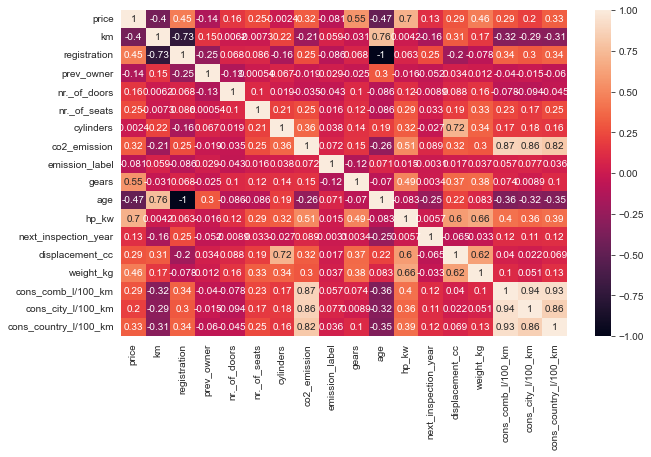

In [23]:
sns.heatmap(df.corr(), annot=True);

In [24]:
df.shape

(15919, 39)

## Dummy Operation

In [49]:
#df.to_csv("autoscoutpart_3_before_dummy.csv", index=False)

In [50]:
cat = df.select_dtypes('object').columns
cat

Index(['make_model', 'body_type', 'vat', 'inspection_new', 'body_color',
       'paint_type', 'gearing_type', 'drive_chain', 'fuel', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'vehicle_condition', 'warranty_month',
       'upholstery_type', 'upholstery_color'],
      dtype='object')

In [51]:
# df = df.join(df["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("coco_"))
# df = df.join(df["entertainment_media"].str.get_dummies(sep = ",").add_prefix("entmedia_"))
# df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("extrs_"))
# df = df.join(df["safety_security"].str.get_dummies(sep = ",").add_prefix("safesec_"))

In [52]:
#df.drop(["comfort_convenience","entertainment_media","extras","safety_security"], axis=1, inplace=True)

In [53]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'prev_owner',
       'inspection_new', 'body_color', 'paint_type', 'nr._of_doors',
       ...
       'safesec_Lane departure warning system', 'safesec_Night view assist',
       'safesec_Passenger-side airbag', 'safesec_Power steering',
       'safesec_Rear airbag', 'safesec_Side airbag',
       'safesec_Tire pressure monitoring system', 'safesec_Traction control',
       'safesec_Traffic sign recognition', 'safesec_Xenon headlights'],
      dtype='object', length=122)

In [54]:
df.shape

(15919, 122)

In [55]:
#df_final = pd.get_dummies(df, drop_first=True)

In [56]:
#df_final.shape

(15919, 167)

In [57]:
#df_final.head()

,price,km,prev_owner,nr._of_doors,nr._of_seats,cylinders,co2_emission,emission_label,gears,age,hp_kw,displacement_cc,weight_kg,cons_comb_l/100_km,coco_Air conditioning,coco_Air suspension,coco_Armrest,coco_Automatic climate control,coco_Auxiliary heating,coco_Cruise control,coco_Electric Starter,coco_Electric tailgate,coco_Electrical side mirrors,coco_Electrically adjustable seats,coco_Electrically heated windshield,coco_Heads-up display,coco_Heated steering wheel,coco_Hill Holder,coco_Keyless central door lock,coco_Leather seats,coco_Leather steering wheel,coco_Light sensor,coco_Lumbar support,coco_Massage seats,coco_Multi-function steering wheel,coco_Navigation system,coco_Panorama roof,coco_Park Distance Control,coco_Parking assist system camera,coco_Parking assist system self-steering,coco_Parking assist system sensors front,coco_Parking assist system sensors rear,coco_Power windows,coco_Rain sensor,coco_Seat heating,coco_Seat ventilation,coco_Split rear seats,coco_Start-stop system,coco_Sunroof,coco_Tinted windows,...,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_YES deduction/negotiation,inspection_new_Yes,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Gold,body_color_Gray,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,paint_type_Perl effect,paint_type_Uni/basic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,fuel_Diesel,fuel_Hybrid,fuel_LPG,fuel_Others,emission_class_Euro 5,emission_class_Euro 6,vehicle_condition_Used,warranty_month_yes_warranty,upholstery_type_Full leather,upholstery_type_Other,upholstery_type_Part leather,upholstery_type_Velour,upholstery_type_alcantara,upholstery_color_Black,upholstery_color_Blue,upholstery_color_Brown,upholstery_color_Grey,upholstery_color_Orange,upholstery_color_Other,upholstery_color_Red,upholstery_color_White,upholstery_color_Yellow
0,15770.000,56013.000,2.000,5.000,5.000,3.000,99.000,4.000,7.000,3.000,66.000,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,14500.000,80000.000,1.000,3.000,4.000,4.000,129.000,4.000,7.000,2.000,141.000,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,14640.000,83450.000,1.000,4.000,4.000,4.000,99.000,4.000,7.000,3.000,85.000,1598.000,1275.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,14500.000,73000.000,1.000,3.000,4.000,3.000,99.000,4.000,6.000,3.000,66.000,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,16790.000,16200.000,1.000,5.000,5.000,3.000,109.000,4.000,7.000,3.000,66.000,1422.000,1195.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [58]:
#df_final.columns= df_final.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [59]:
#df_final.head()

,price,km,prev_owner,nr._of_doors,nr._of_seats,cylinders,co2_emission,emission_label,gears,age,hp_kw,displacement_cc,weight_kg,cons_comb_l/100_km,coco_air_conditioning,coco_air_suspension,coco_armrest,coco_automatic_climate_control,coco_auxiliary_heating,coco_cruise_control,coco_electric_starter,coco_electric_tailgate,coco_electrical_side_mirrors,coco_electrically_adjustable_seats,coco_electrically_heated_windshield,coco_heads-up_display,coco_heated_steering_wheel,coco_hill_holder,coco_keyless_central_door_lock,coco_leather_seats,coco_leather_steering_wheel,coco_light_sensor,coco_lumbar_support,coco_massage_seats,coco_multi-function_steering_wheel,coco_navigation_system,coco_panorama_roof,coco_park_distance_control,coco_parking_assist_system_camera,coco_parking_assist_system_self-steering,coco_parking_assist_system_sensors_front,coco_parking_assist_system_sensors_rear,coco_power_windows,coco_rain_sensor,coco_seat_heating,coco_seat_ventilation,coco_split_rear_seats,coco_start-stop_system,coco_sunroof,coco_tinted_windows,...,body_type_coupe,body_type_off-road,body_type_other,body_type_sedans,body_type_station_wagon,body_type_transporter,body_type_van,vat_yes_deduction/negotiation,inspection_new_yes,body_color_black,body_color_blue,body_color_bronze,body_color_brown,body_color_gold,body_color_gray,body_color_green,body_color_grey,body_color_orange,body_color_red,body_color_silver,body_color_violet,body_color_white,body_color_yellow,paint_type_perl_effect,paint_type_uni/basic,gearing_type_manual,gearing_type_semi-automatic,drive_chain_front,fuel_diesel,fuel_hybrid,fuel_lpg,fuel_others,emission_class_euro_5,emission_class_euro_6,vehicle_condition_used,warranty_month_yes_warranty,upholstery_type_full_leather,upholstery_type_other,upholstery_type_part_leather,upholstery_type_velour,upholstery_type_alcantara,upholstery_color_black,upholstery_color_blue,upholstery_color_brown,upholstery_color_grey,upholstery_color_orange,upholstery_color_other,upholstery_color_red,upholstery_color_white,upholstery_color_yellow
0,15770.000,56013.000,2.000,5.000,5.000,3.000,99.000,4.000,7.000,3.000,66.000,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,14500.000,80000.000,1.000,3.000,4.000,4.000,129.000,4.000,7.000,2.000,141.000,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,14640.000,83450.000,1.000,4.000,4.000,4.000,99.000,4.000,7.000,3.000,85.000,1598.000,1275.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,14500.000,73000.000,1.000,3.000,4.000,3.000,99.000,4.000,6.000,3.000,66.000,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,16790.000,16200.000,1.000,5.000,5.000,3.000,109.000,4.000,7.000,3.000,66.000,1422.000,1195.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [61]:
#df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Columns: 167 entries, price to upholstery_color_yellow
dtypes: float64(14), int64(94), uint8(59)
memory usage: 14.0 MB


In [62]:
#df_final.to_csv("autoscoutpart_3_dummy(prev_owner).csv", index=False)

In [63]:
#df1 = pd.read_csv('autoscoutpart_3_dummy(prev_owner).csv')

In [64]:
#df1.head()

,price,km,prev_owner,nr._of_doors,nr._of_seats,cylinders,co2_emission,emission_label,gears,age,hp_kw,displacement_cc,weight_kg,cons_comb_l/100_km,coco_air_conditioning,coco_air_suspension,coco_armrest,coco_automatic_climate_control,coco_auxiliary_heating,coco_cruise_control,coco_electric_starter,coco_electric_tailgate,coco_electrical_side_mirrors,coco_electrically_adjustable_seats,coco_electrically_heated_windshield,coco_heads-up_display,coco_heated_steering_wheel,coco_hill_holder,coco_keyless_central_door_lock,coco_leather_seats,coco_leather_steering_wheel,coco_light_sensor,coco_lumbar_support,coco_massage_seats,coco_multi-function_steering_wheel,coco_navigation_system,coco_panorama_roof,coco_park_distance_control,coco_parking_assist_system_camera,coco_parking_assist_system_self-steering,coco_parking_assist_system_sensors_front,coco_parking_assist_system_sensors_rear,coco_power_windows,coco_rain_sensor,coco_seat_heating,coco_seat_ventilation,coco_split_rear_seats,coco_start-stop_system,coco_sunroof,coco_tinted_windows,...,body_type_coupe,body_type_off-road,body_type_other,body_type_sedans,body_type_station_wagon,body_type_transporter,body_type_van,vat_yes_deduction/negotiation,inspection_new_yes,body_color_black,body_color_blue,body_color_bronze,body_color_brown,body_color_gold,body_color_gray,body_color_green,body_color_grey,body_color_orange,body_color_red,body_color_silver,body_color_violet,body_color_white,body_color_yellow,paint_type_perl_effect,paint_type_uni/basic,gearing_type_manual,gearing_type_semi-automatic,drive_chain_front,fuel_diesel,fuel_hybrid,fuel_lpg,fuel_others,emission_class_euro_5,emission_class_euro_6,vehicle_condition_used,warranty_month_yes_warranty,upholstery_type_full_leather,upholstery_type_other,upholstery_type_part_leather,upholstery_type_velour,upholstery_type_alcantara,upholstery_color_black,upholstery_color_blue,upholstery_color_brown,upholstery_color_grey,upholstery_color_orange,upholstery_color_other,upholstery_color_red,upholstery_color_white,upholstery_color_yellow
0,15770.000,56013.000,2.000,5.000,5.000,3.000,99.000,4.000,7.000,3.000,66.000,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,14500.000,80000.000,1.000,3.000,4.000,4.000,129.000,4.000,7.000,2.000,141.000,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,14640.000,83450.000,1.000,4.000,4.000,4.000,99.000,4.000,7.000,3.000,85.000,1598.000,1275.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,14500.000,73000.000,1.000,3.000,4.000,3.000,99.000,4.000,6.000,3.000,66.000,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,16790.000,16200.000,1.000,5.000,5.000,3.000,109.000,4.000,7.000,3.000,66.000,1422.000,1195.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
